<a href="https://colab.research.google.com/github/guptadj/L-T_task/blob/main/Electric_fault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TASK** **2**

In [ ]:
###  TASK 2

# importing neccesary library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # to render higher resolution images

In [ ]:
# Extracting data
train_data = pd.read_csv("/classData.csv")
test_file = pd.read_csv("/detect_dataset.csv")

In [ ]:
train_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of features</b>'))
train_data.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


# Missing values

In [ ]:
print(f"Shape of the dataset is {train_data.shape} \n")
print(f"Data types of the columns are: ")
print(train_data.dtypes)

Shape of the dataset is (7861, 10) 

Data types of the columns are: 
G       int64
C       int64
B       int64
A       int64
Ia    float64
Ib    float64
Ic    float64
Va    float64
Vb    float64
Vc    float64
dtype: object


In [ ]:
# Checking of missing values
print(f"\nNumber of missing values for each feature:")
print(train_data.isnull().sum())


Number of missing values for each feature:
G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


In [ ]:
# [0 0 0 0] - No Fault
# [1 0 0 1] - LG fault (Between Phase A and Gnd)
# [0 0 1 1] - LL fault (Between Phase A and Phase B)
# [1 0 1 1] - LLG Fault (Between Phases A,B and ground)
# [0 1 1 1] - LLL Fault(Between all three phases)
# [1 1 1 1] - LLLG fault( Three phase symmetrical fault)

### **Data Exploration**

In [ ]:
new_train_data = train_data.copy()

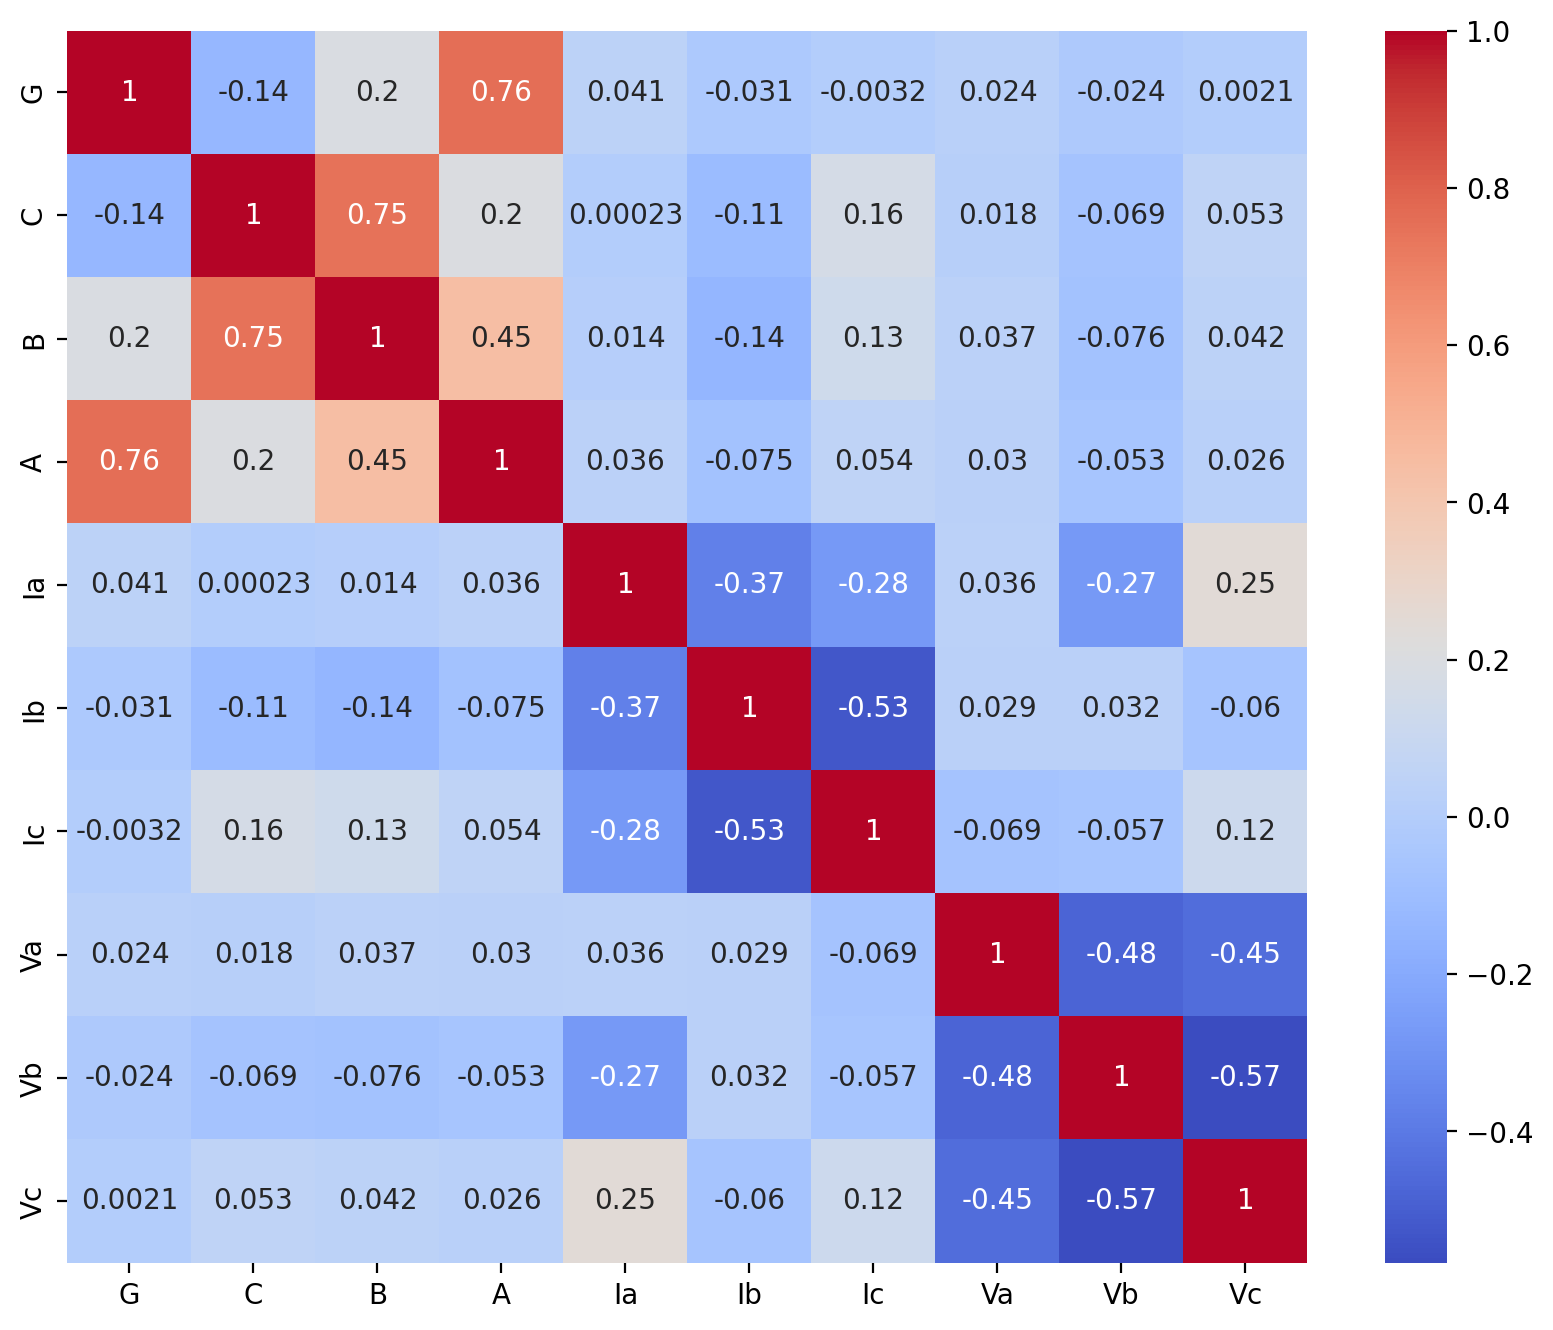

In [ ]:
plt.figure(figsize = (10,8))
corr = new_train_data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

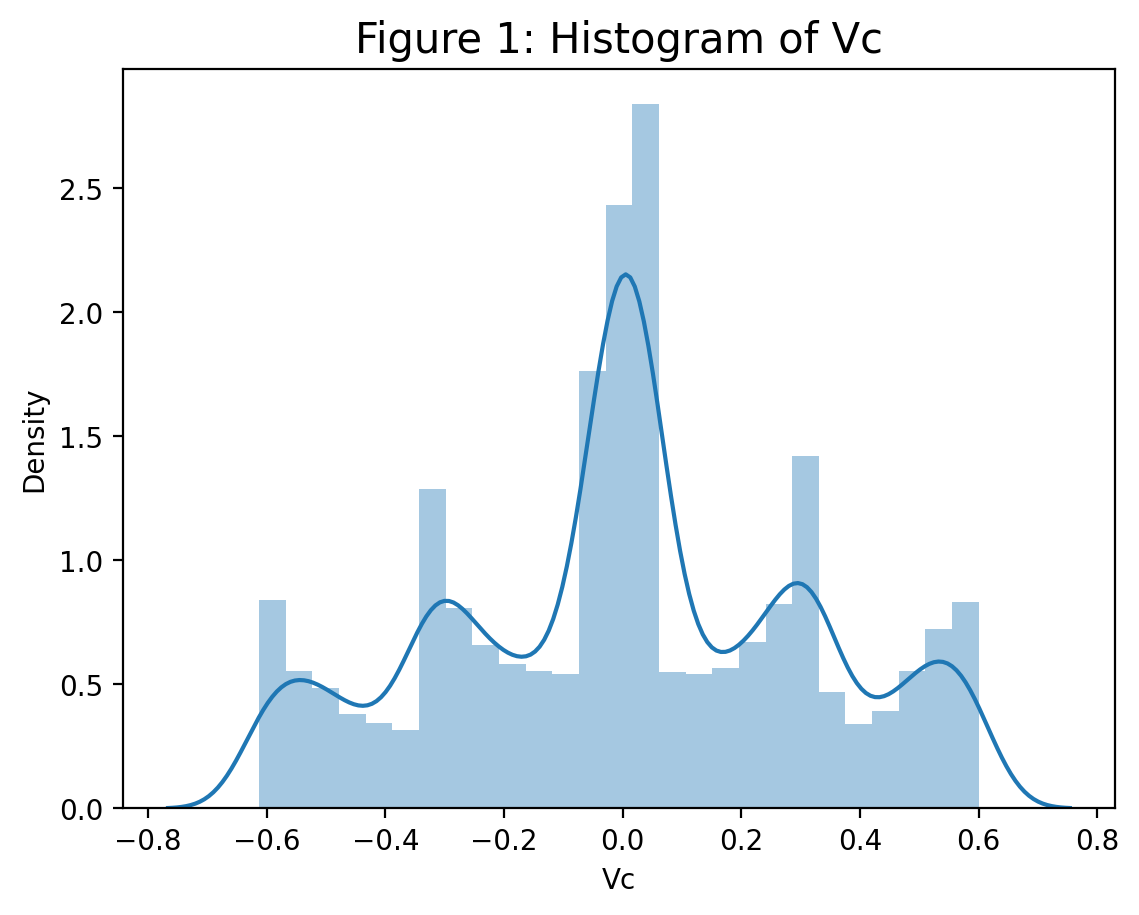

In [ ]:
sns.distplot(new_train_data["Vc"], kde=True).set_title(
    "Figure 1: Histogram of Vc", fontsize=15
)
plt.show()

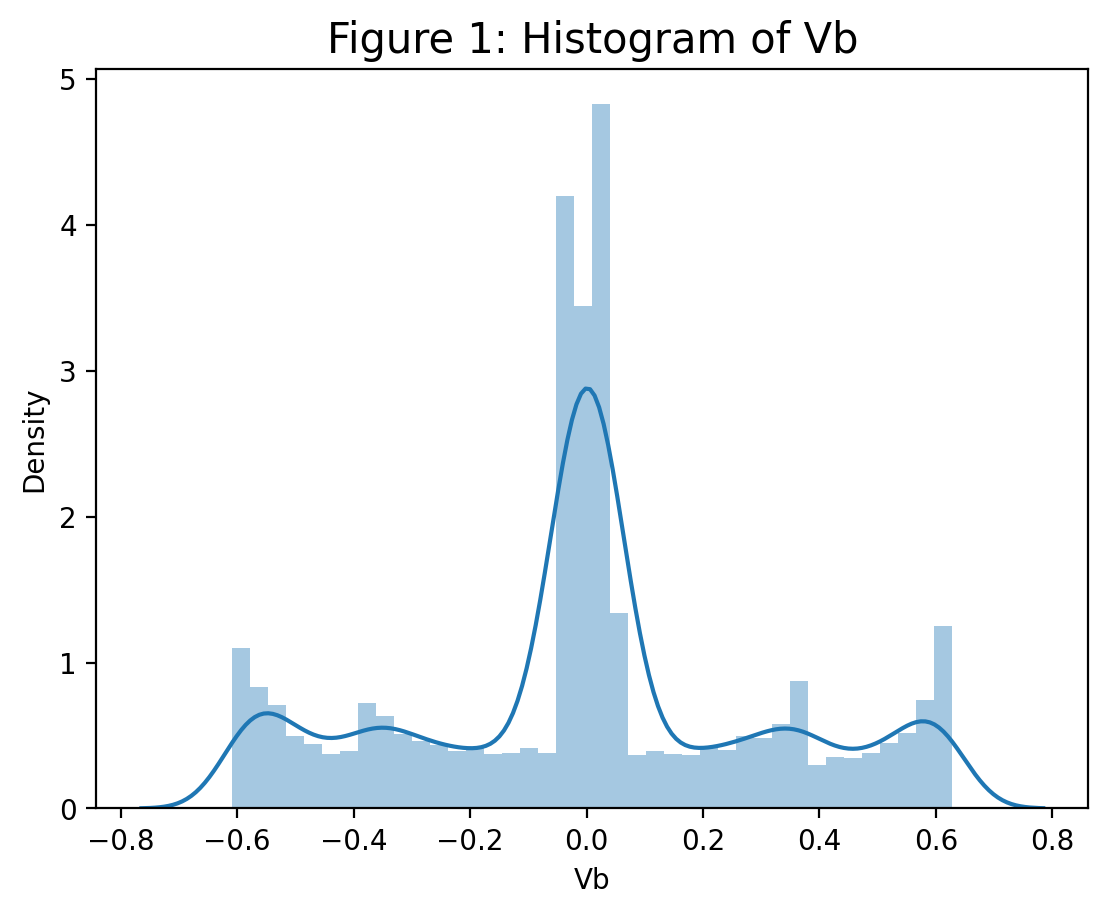

In [ ]:
sns.distplot(new_train_data["Vb"], kde=True).set_title(
    "Figure 1: Histogram of Vb", fontsize=15
)
plt.show()

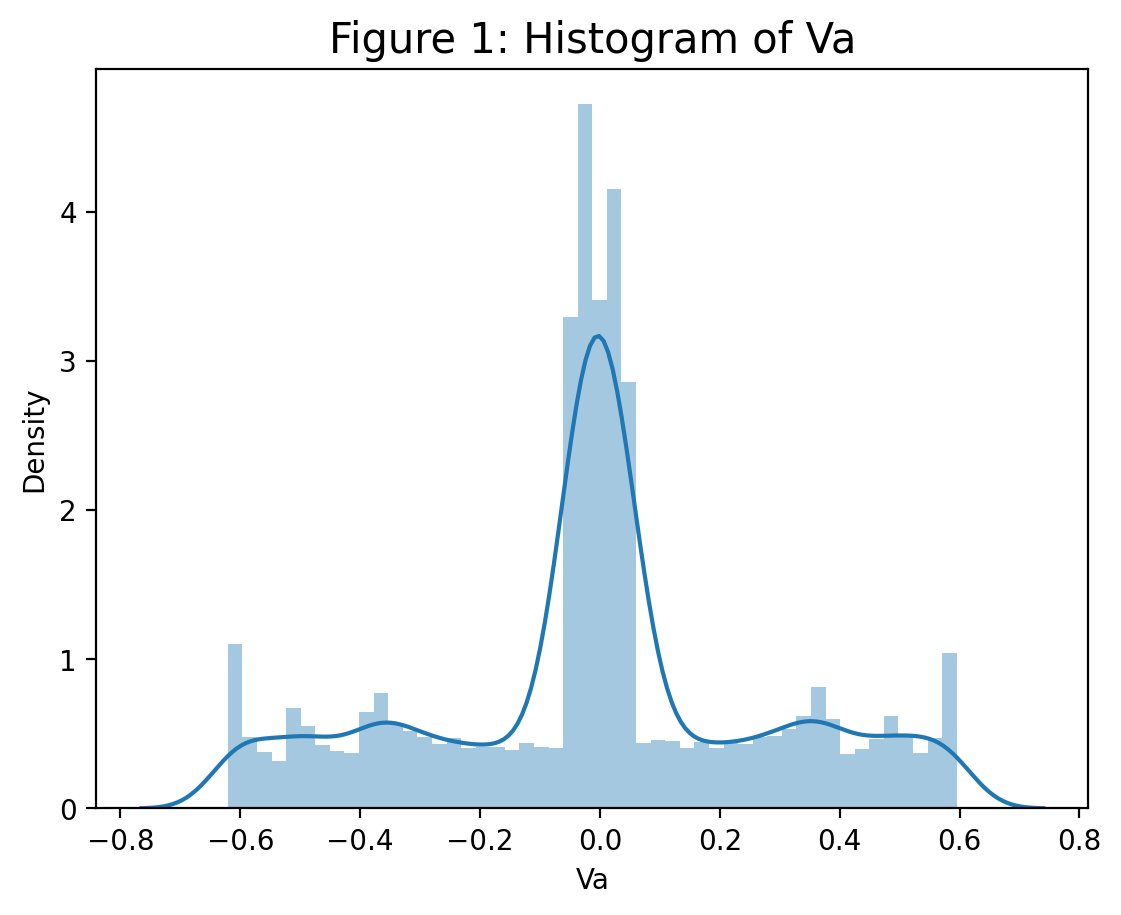

In [ ]:
sns.distplot(new_train_data["Va"], kde=True).set_title(
    "Figure 1: Histogram of Va", fontsize=15
)
plt.show()

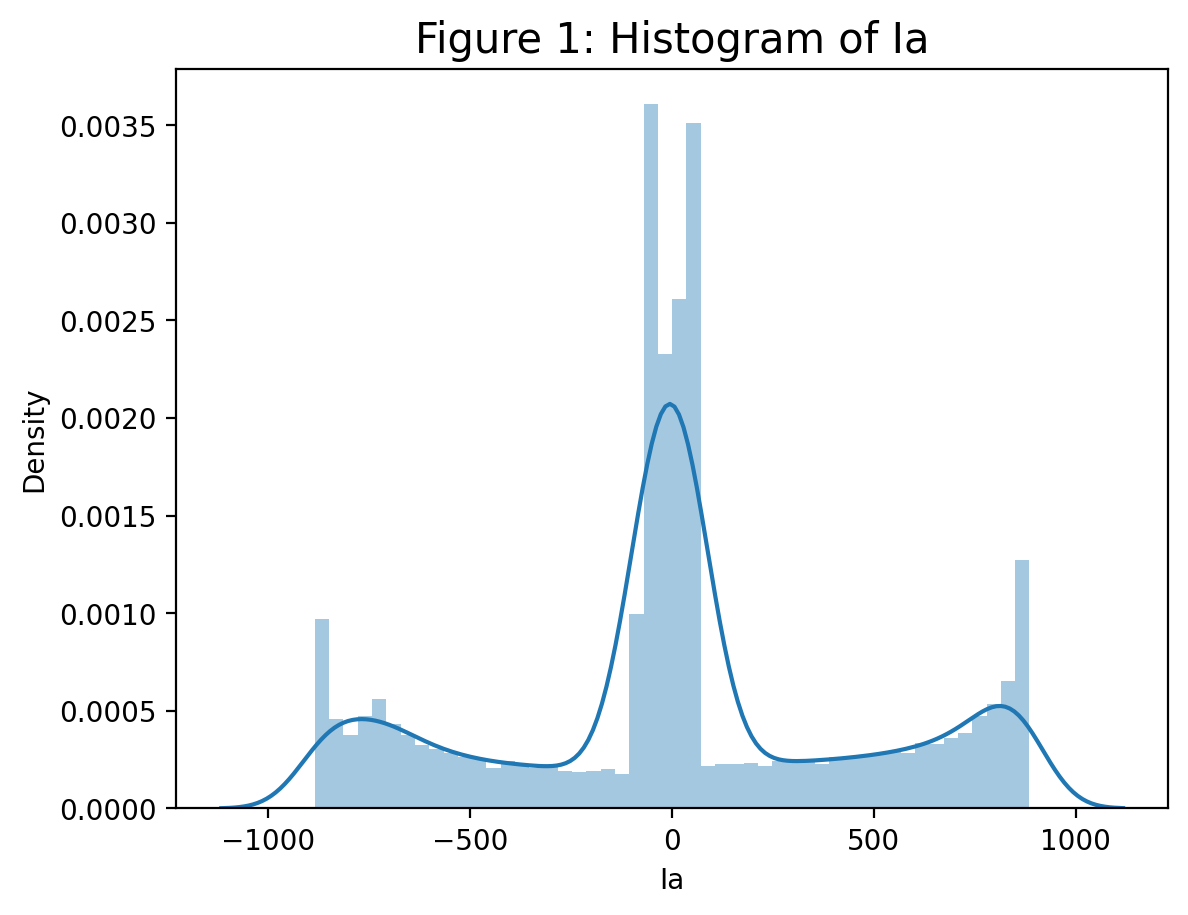

In [ ]:
sns.distplot(new_train_data["Ia"], kde=True).set_title(
    "Figure 1: Histogram of Ia", fontsize=15
)
plt.show()

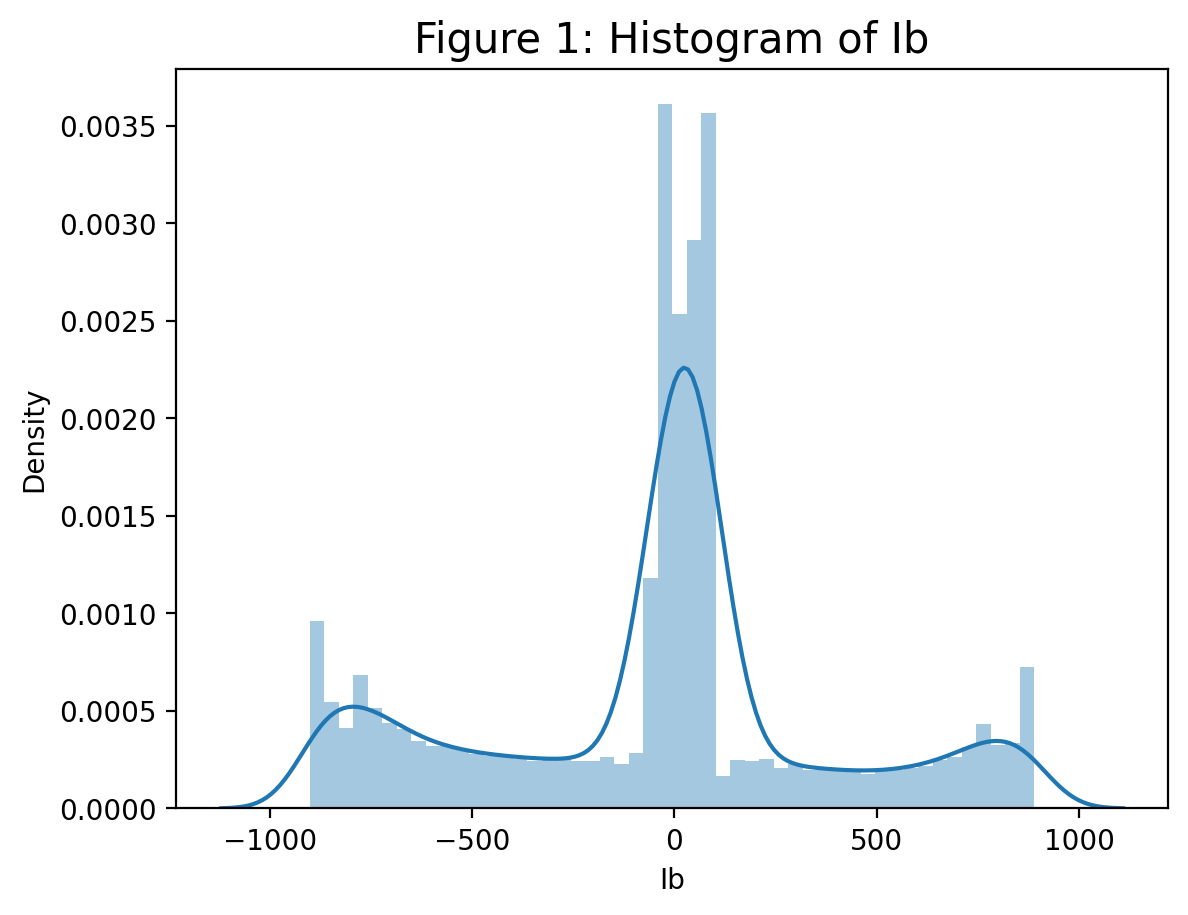

In [ ]:
sns.distplot(new_train_data["Ib"], kde=True).set_title(
    "Figure 1: Histogram of Ib", fontsize=15
)
plt.show()

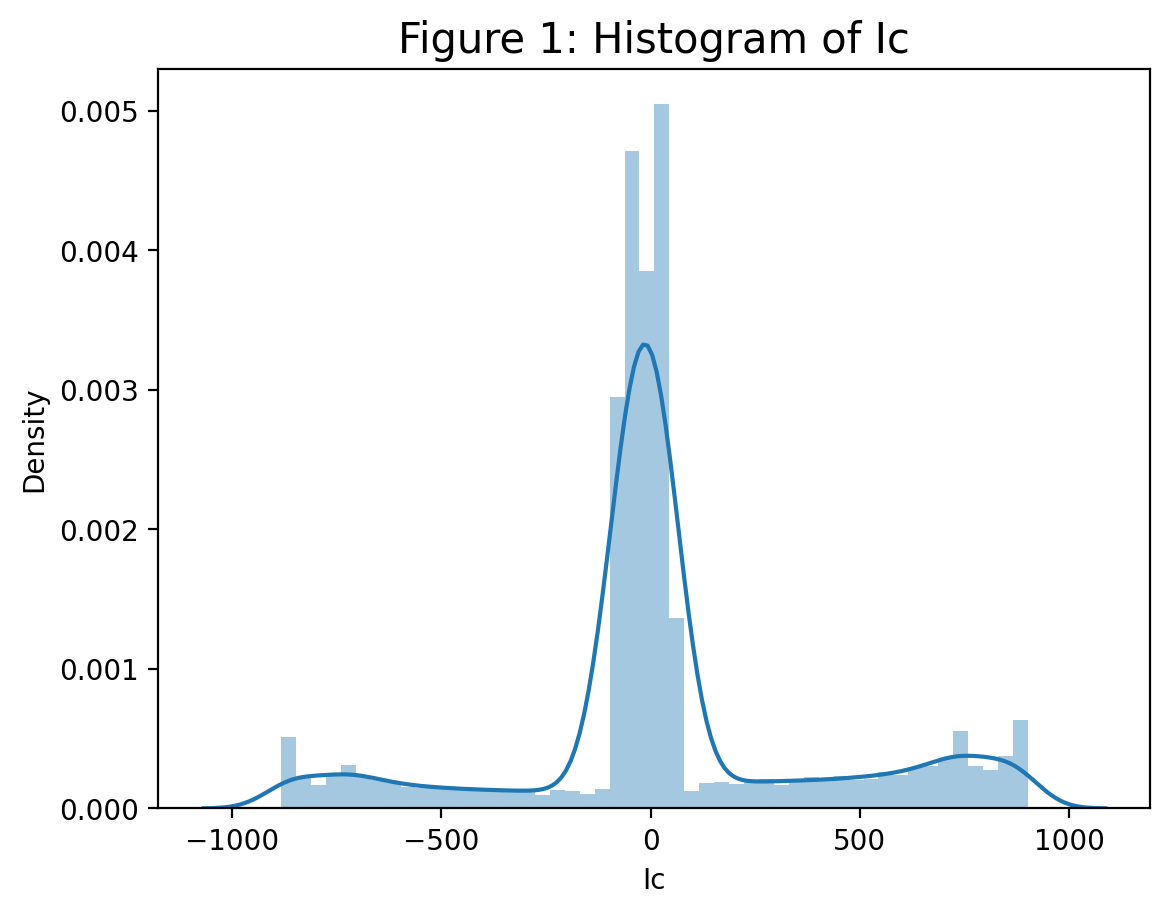

In [ ]:
sns.distplot(new_train_data["Ic"], kde=True).set_title(
    "Figure 1: Histogram of Ic", fontsize=15
)
plt.show()

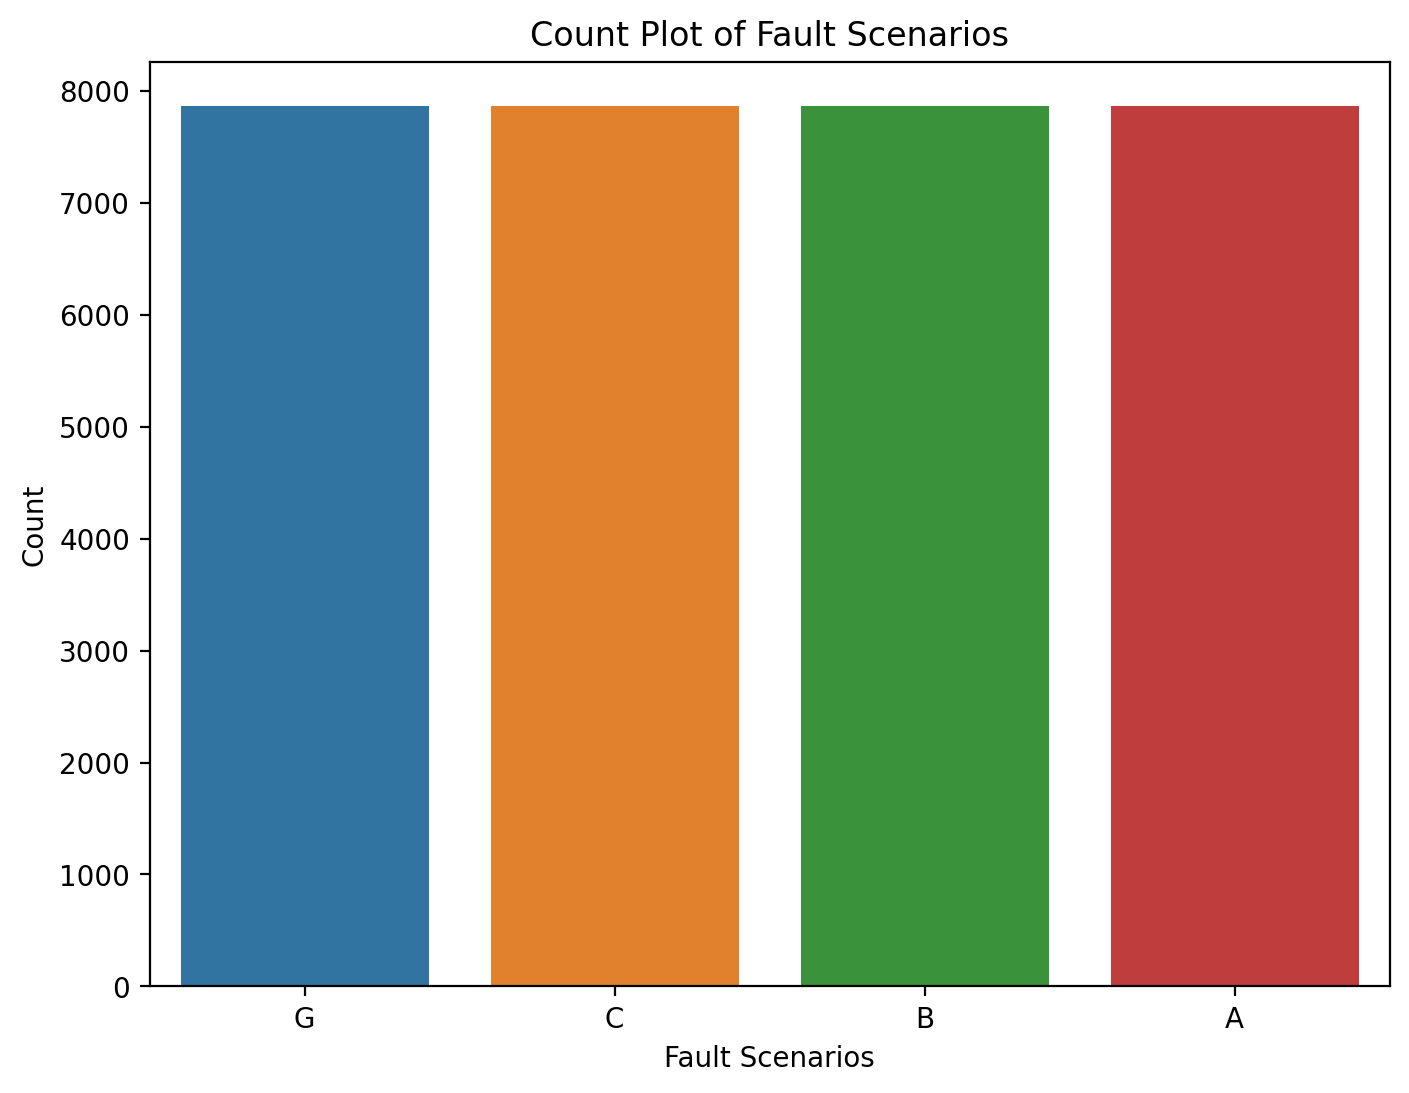

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_train_data[['G', 'C', 'B', 'A']])
plt.title('Count Plot of Fault Scenarios')
plt.xlabel('Fault Scenarios')
plt.ylabel('Count')
plt.show()


In [ ]:
data = {
    "G": [0, 1, 0, 1, 0, 1],
    "C": [0, 0, 1, 0, 1, 1],
    "B": [0, 0, 1, 1, 1, 1],
    "A": [0, 1, 0, 1, 1, 1],
}
clts = pd.DataFrame(data)

# [0 0 0 0] - No Fault
# [1 0 0 1] - LG fault (Between Phase A and Gnd)
# [0 0 1 1] - LL fault (Between Phase A and Phase B)
# [1 0 1 1] - LLG Fault (Between Phases A,B and ground)
# [0 1 1 1] - LLL Fault(Between all three phases)
# [1 1 1 1] - LLLG fault( Three phase symmetrical fault)

In [ ]:
fault_types = clts.value_counts(sort=False)

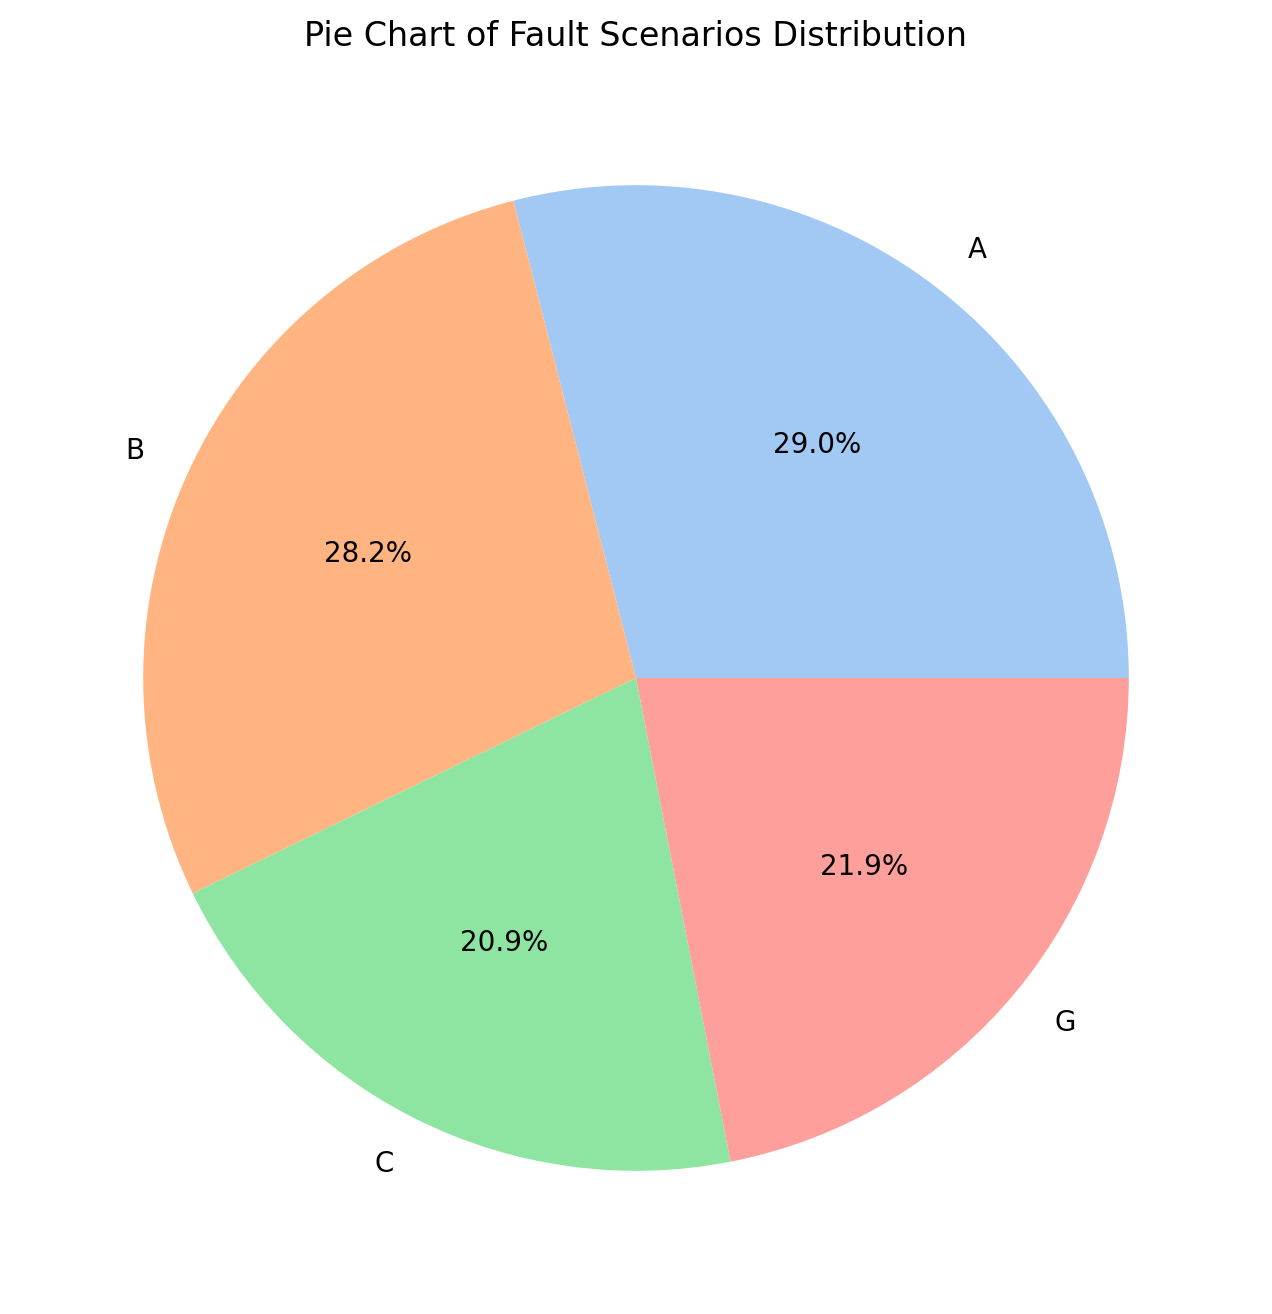

In [ ]:
fault_counts = new_train_data[['A', 'B', 'C', 'G']].sum()

plt.figure(figsize=(8, 8))
plt.pie(fault_counts, labels=fault_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fault Scenarios Distribution')
plt.show()

In [ ]:
# Calculate mean and standard deviation for training data
mean_train = new_train_data[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].mean()
std_train = train_data[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].std()

# Calculate mean and standard deviation for test data
mean_test = test_file[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].mean()
std_test = test_file[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].std()

# Display results
print("Mean for training data:")
print(mean_train)
print("\nStandard Deviation for training data:")
print(std_train)

print("\nMean for test data:")
print(mean_test)
print("\nStandard Deviation for test data:")
print(std_test)

Mean for training data:
Ia    13.721194
Ib   -44.845268
Ic    34.392394
Va    -0.007667
Vb     0.001152
Vc     0.006515
dtype: float64

Standard Deviation for training data:
Ia    464.741671
Ib    439.269195
Ic    371.107412
Va      0.289150
Vb      0.313437
Vc      0.307897
dtype: float64

Mean for test data:
Ia     6.709369
Ib   -26.557793
Ic    22.353043
Va     0.010517
Vb    -0.015498
Vc     0.004980
dtype: float64

Standard Deviation for test data:
Ia    377.158470
Ib    357.458613
Ic    302.052809
Va      0.346221
Vb      0.357644
Vc      0.349272
dtype: float64


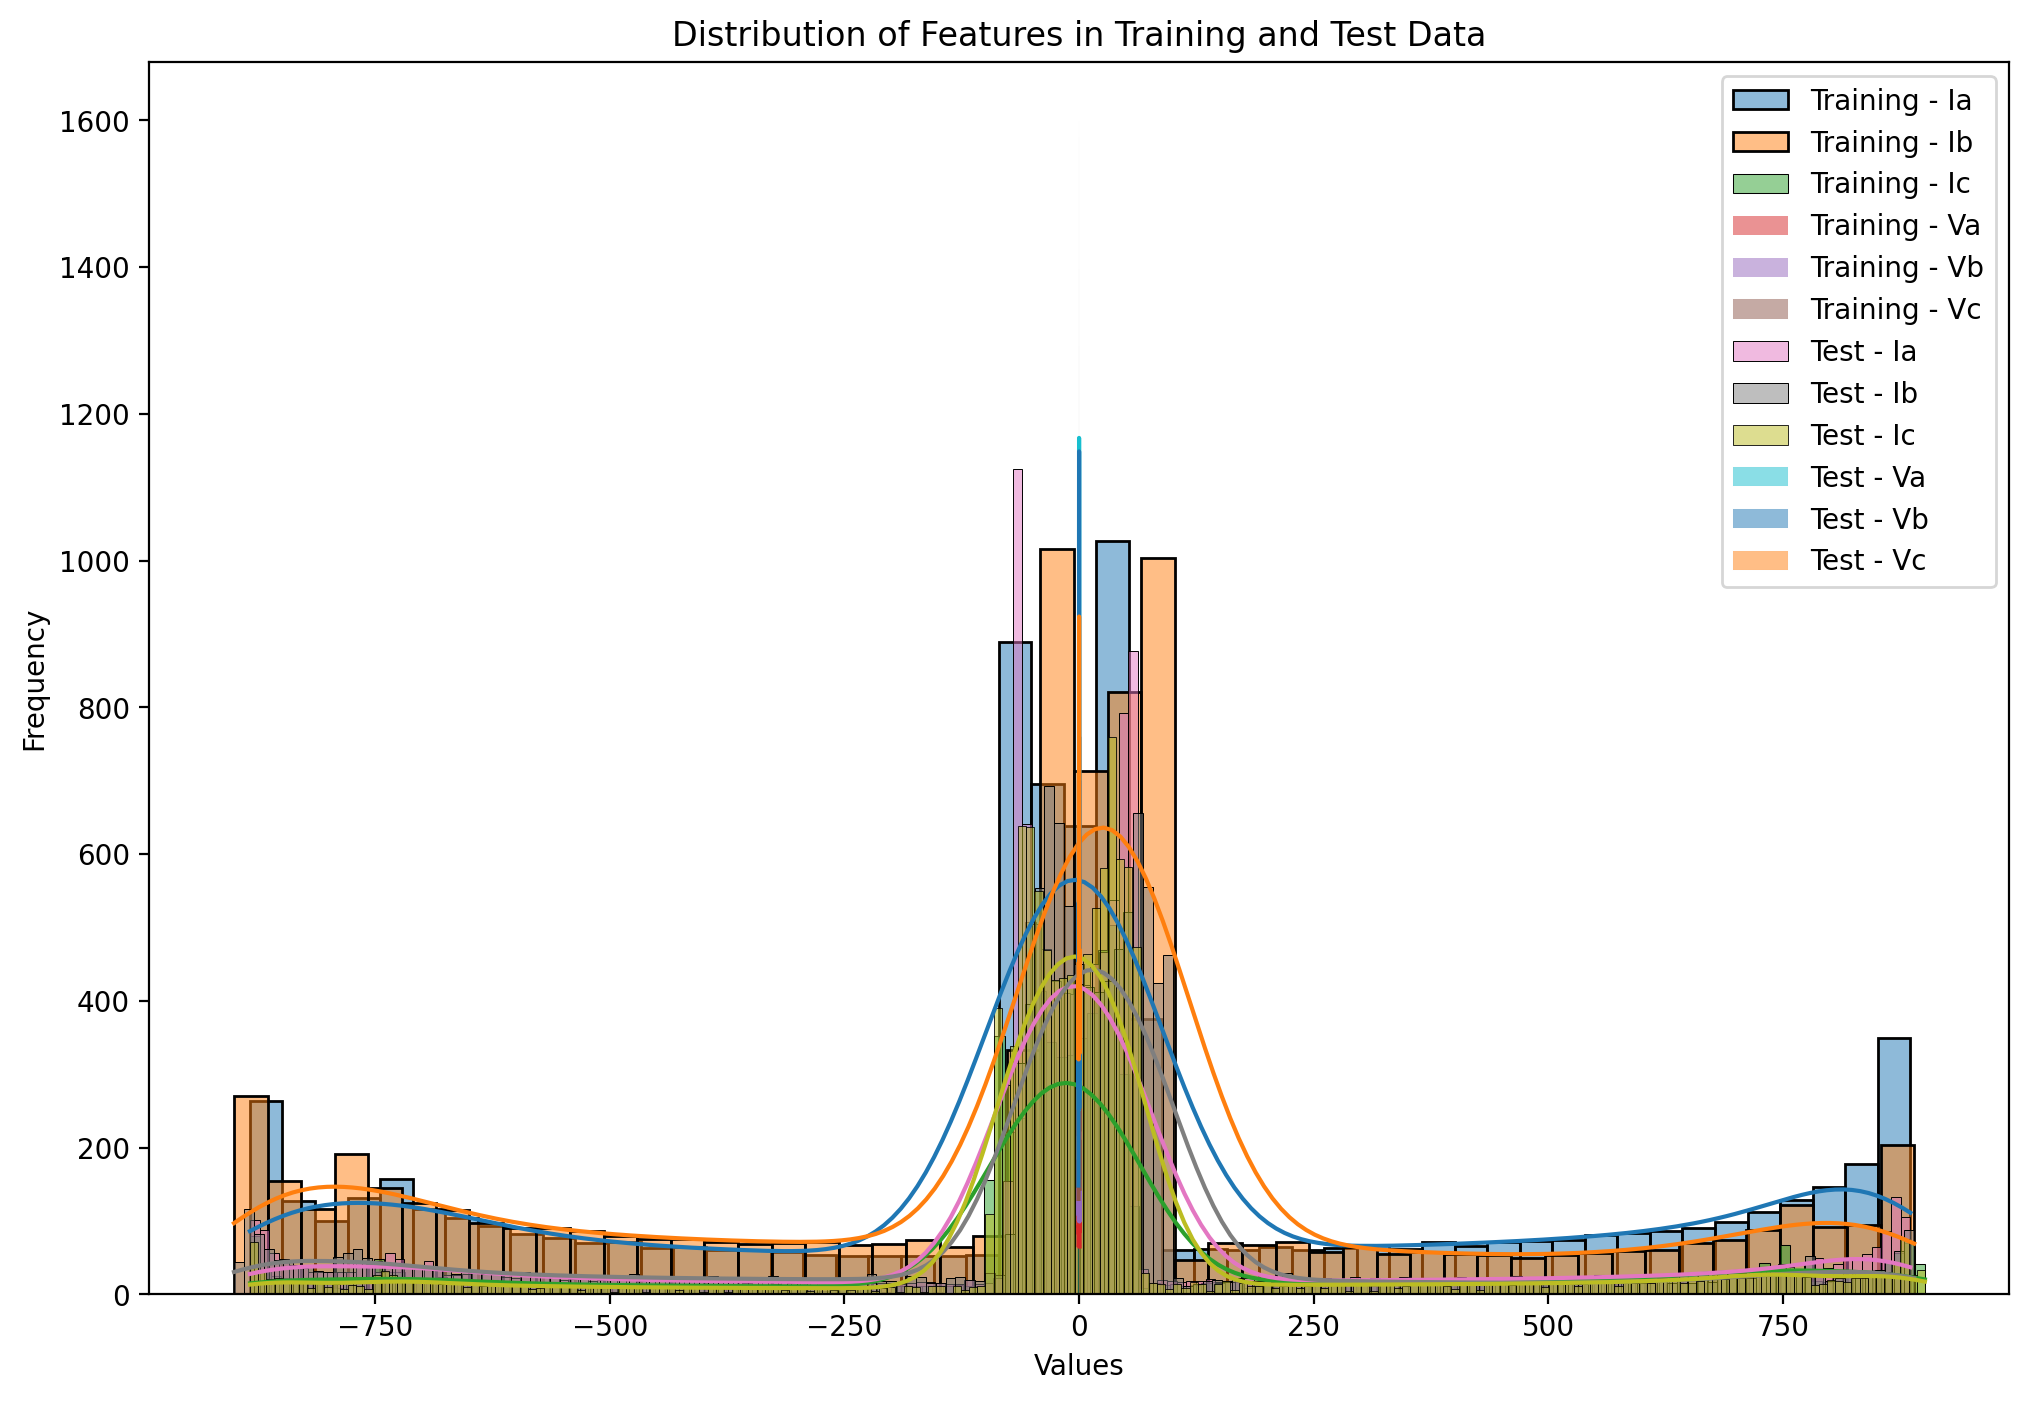

In [ ]:
# Extracting features
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

# Plot histograms for training data
plt.figure(figsize=(12, 8))
for feature in features:
    sns.histplot(train_data[feature], kde=True, label=f'Training - {feature}')

# Plot histograms for test data
for feature in features:
    sns.histplot(test_file[feature], kde=True, label=f'Test - {feature}')

plt.title('Distribution of Features in Training and Test Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

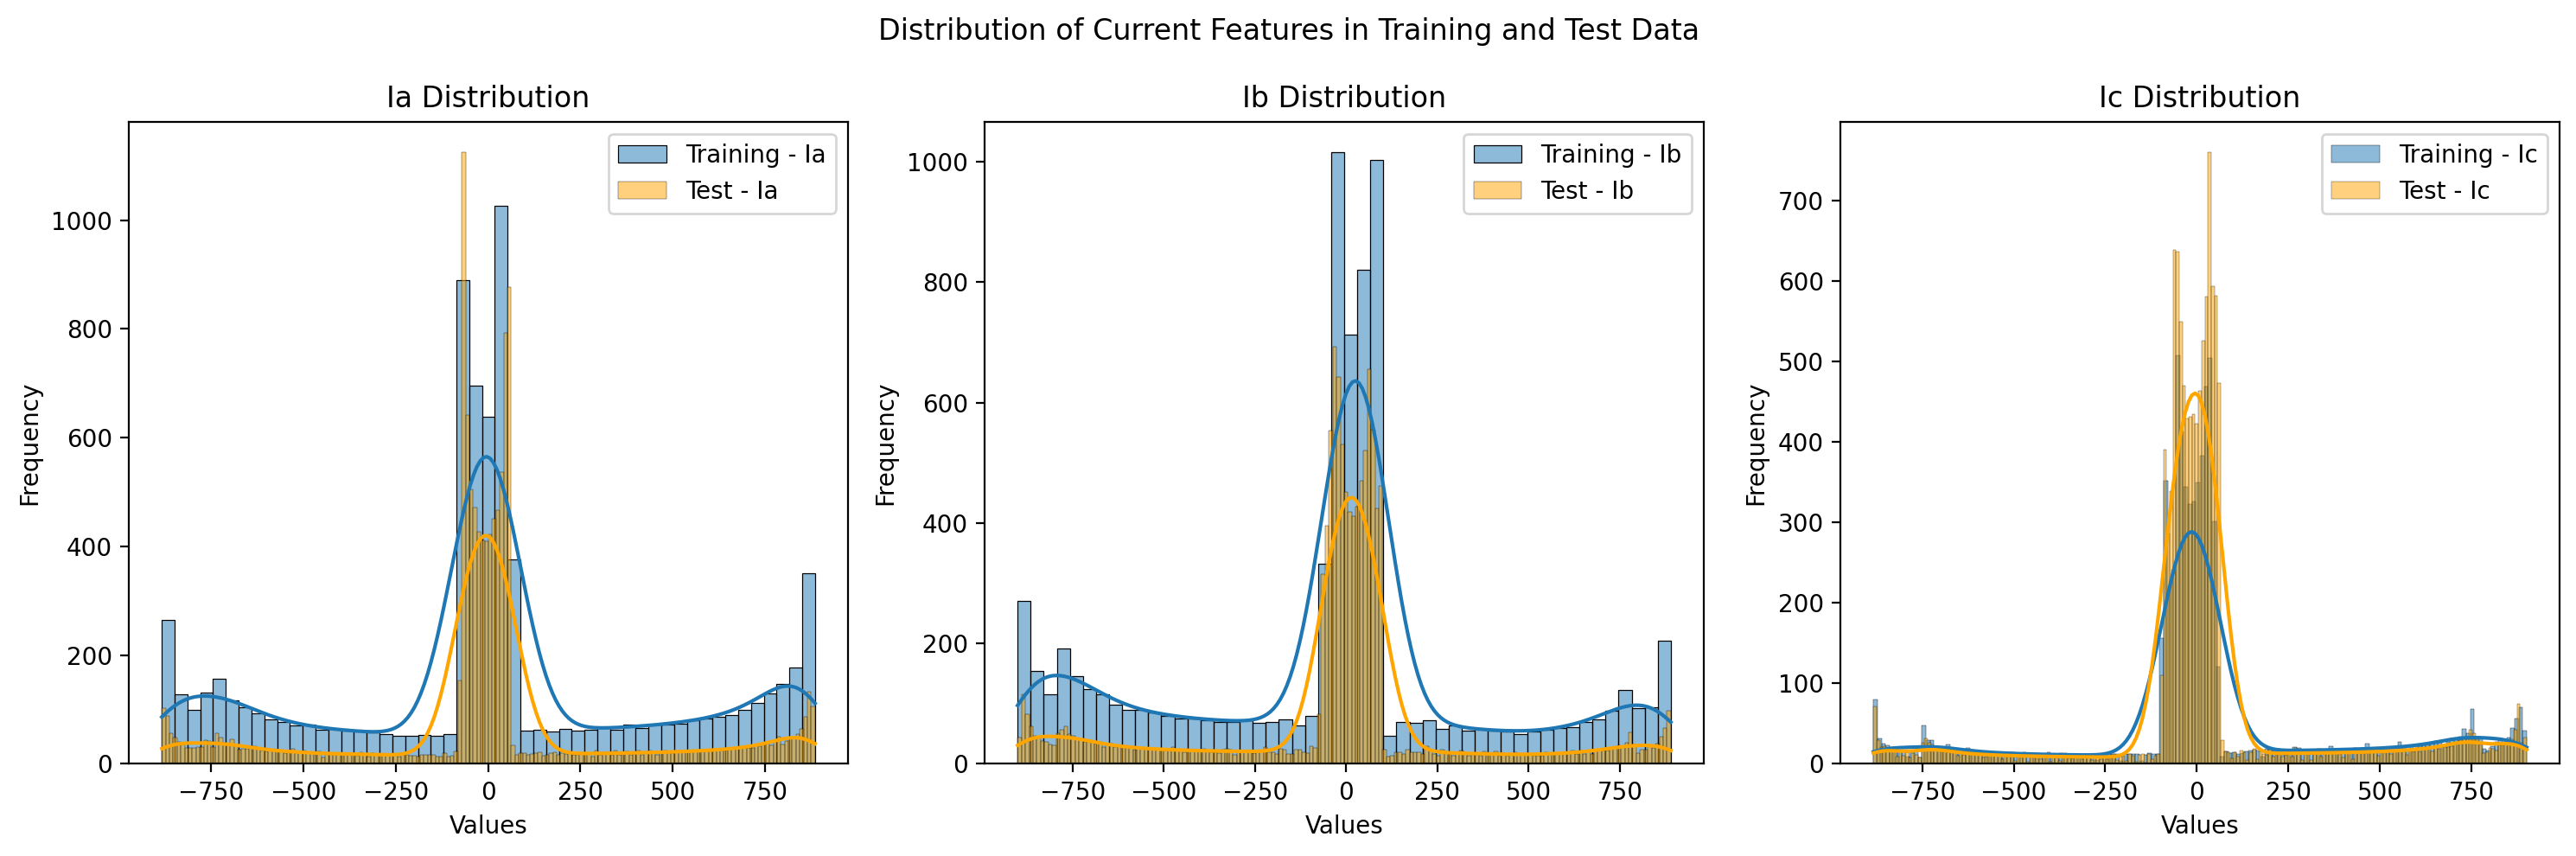

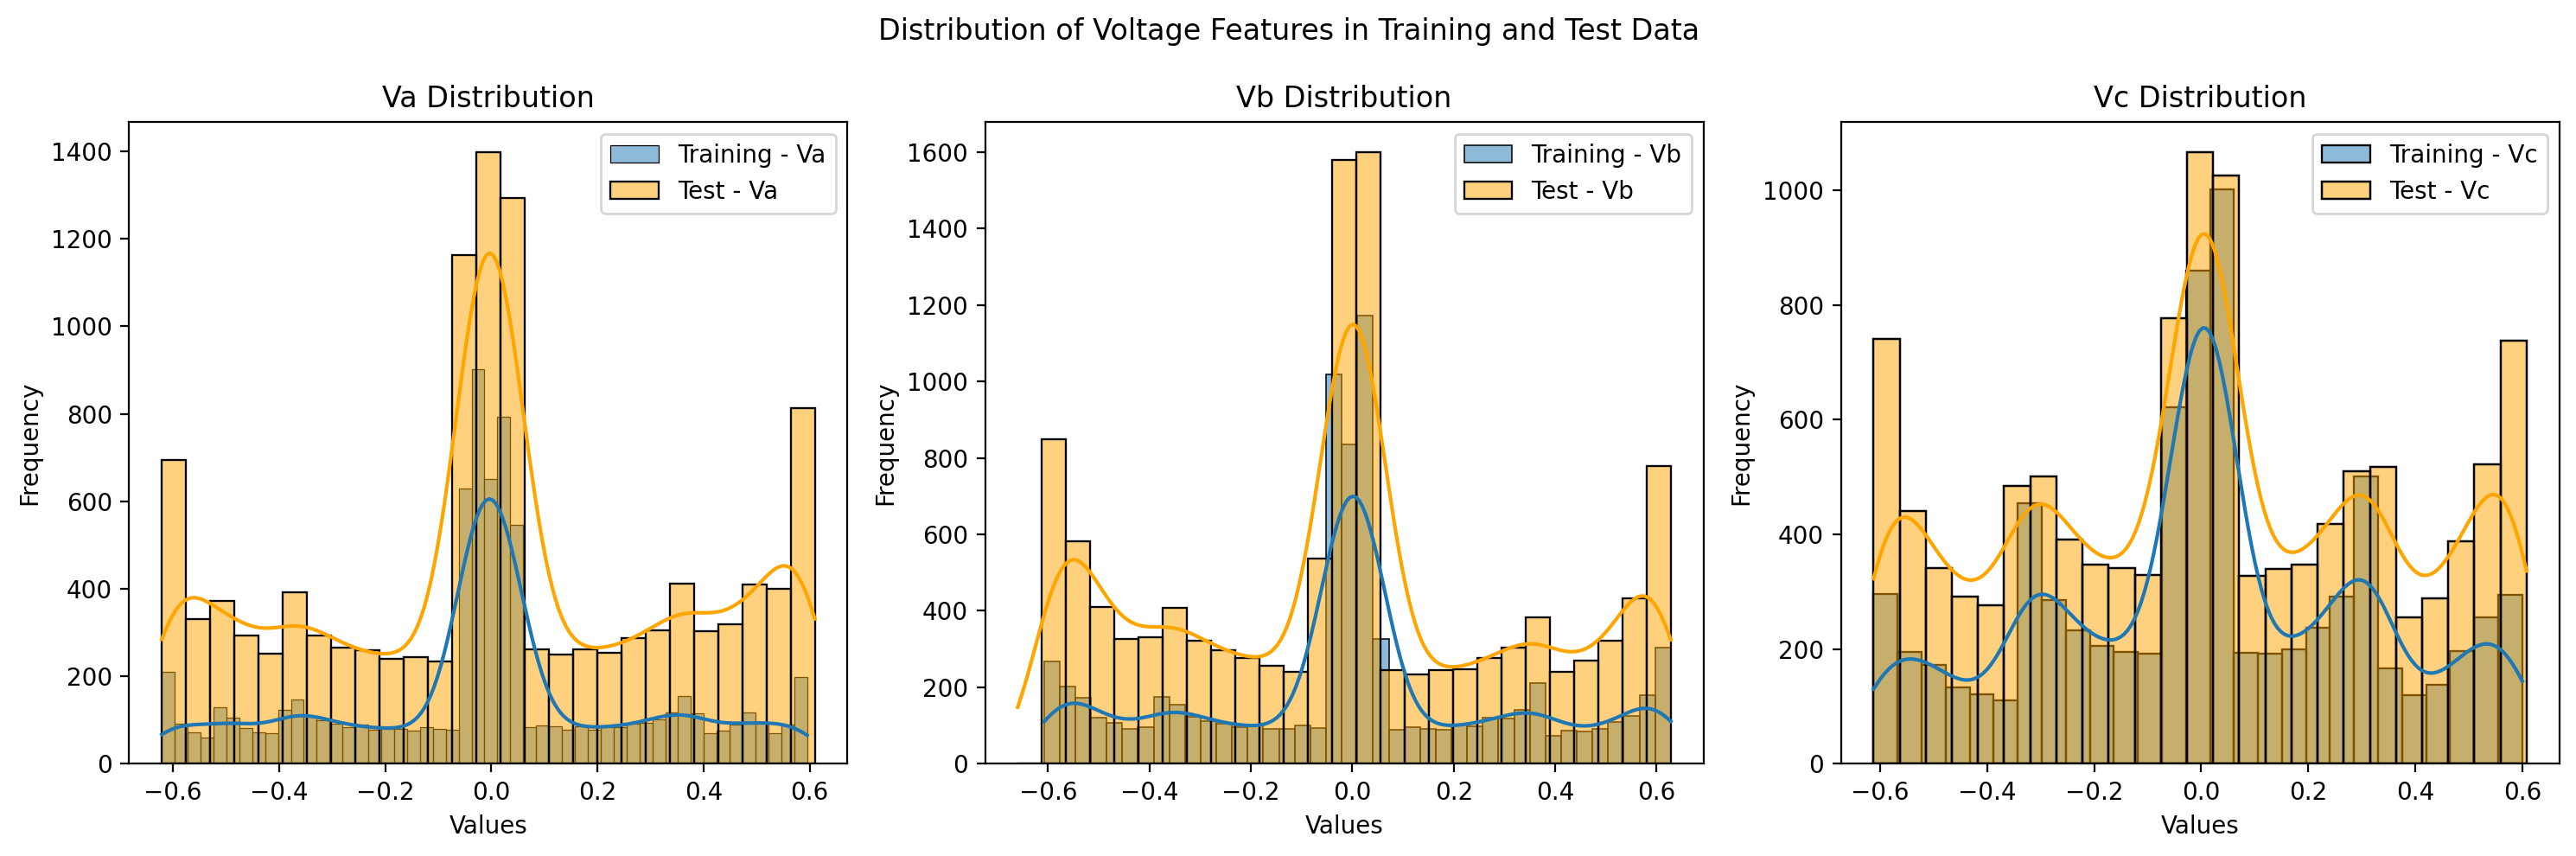

In [ ]:
# Extracting features
current_features = ['Ia', 'Ib', 'Ic']
voltage_features = ['Va', 'Vb', 'Vc']

# Plot histograms for current features in training data
plt.figure(figsize=(15, 5))
plt.suptitle('Distribution of Current Features in Training and Test Data')

for i, feature in enumerate(current_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(train_data[feature], kde=True, label=f'Training - {feature}')
    sns.histplot(test_file[feature], kde=True, label=f'Test - {feature}', color='orange')
    plt.title(f'{feature} Distribution')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot histograms for voltage features in training data
plt.figure(figsize=(15, 5))
plt.suptitle('Distribution of Voltage Features in Training and Test Data')

for i, feature in enumerate(voltage_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(train_data[feature], kde=True, label=f'Training - {feature}')
    sns.histplot(test_file[feature], kde=True, label=f'Test - {feature}', color='orange')
    plt.title(f'{feature} Distribution')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

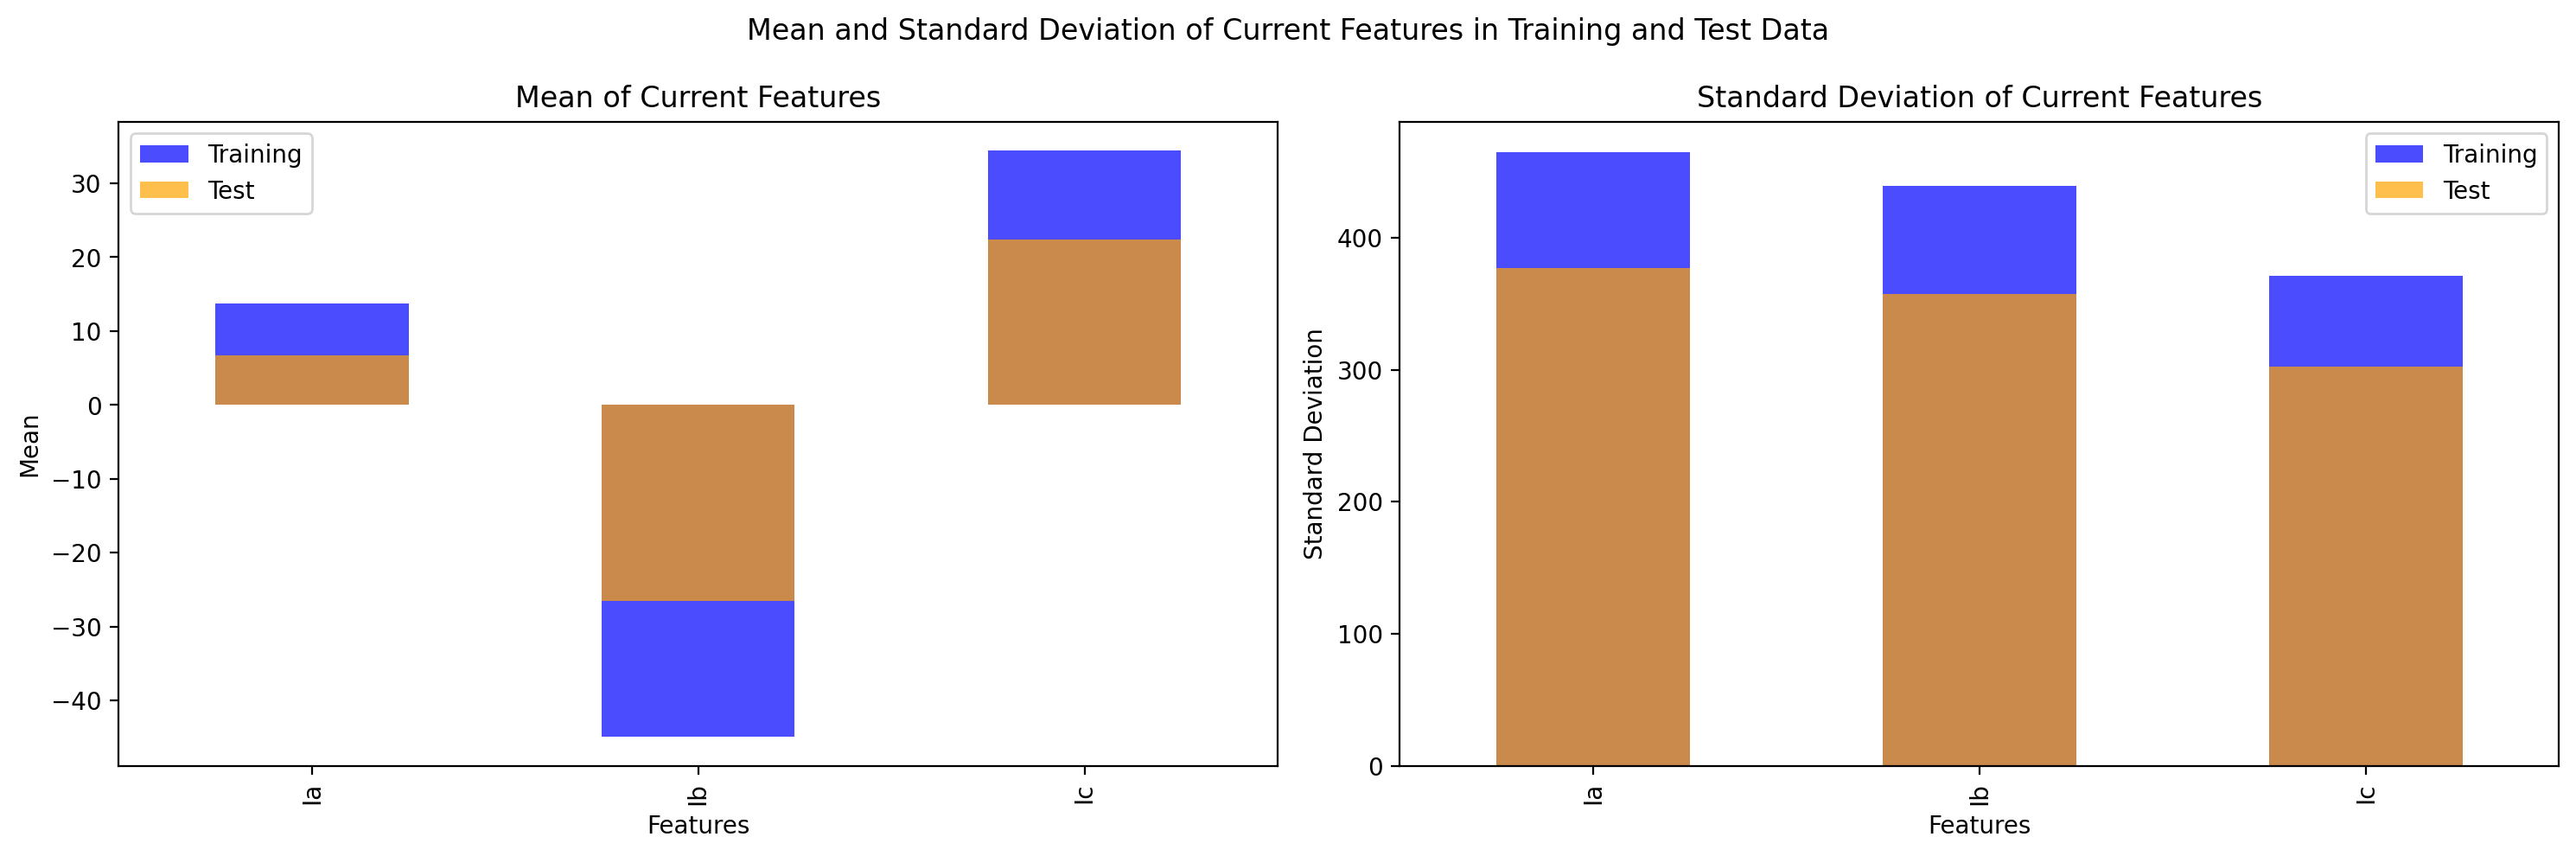

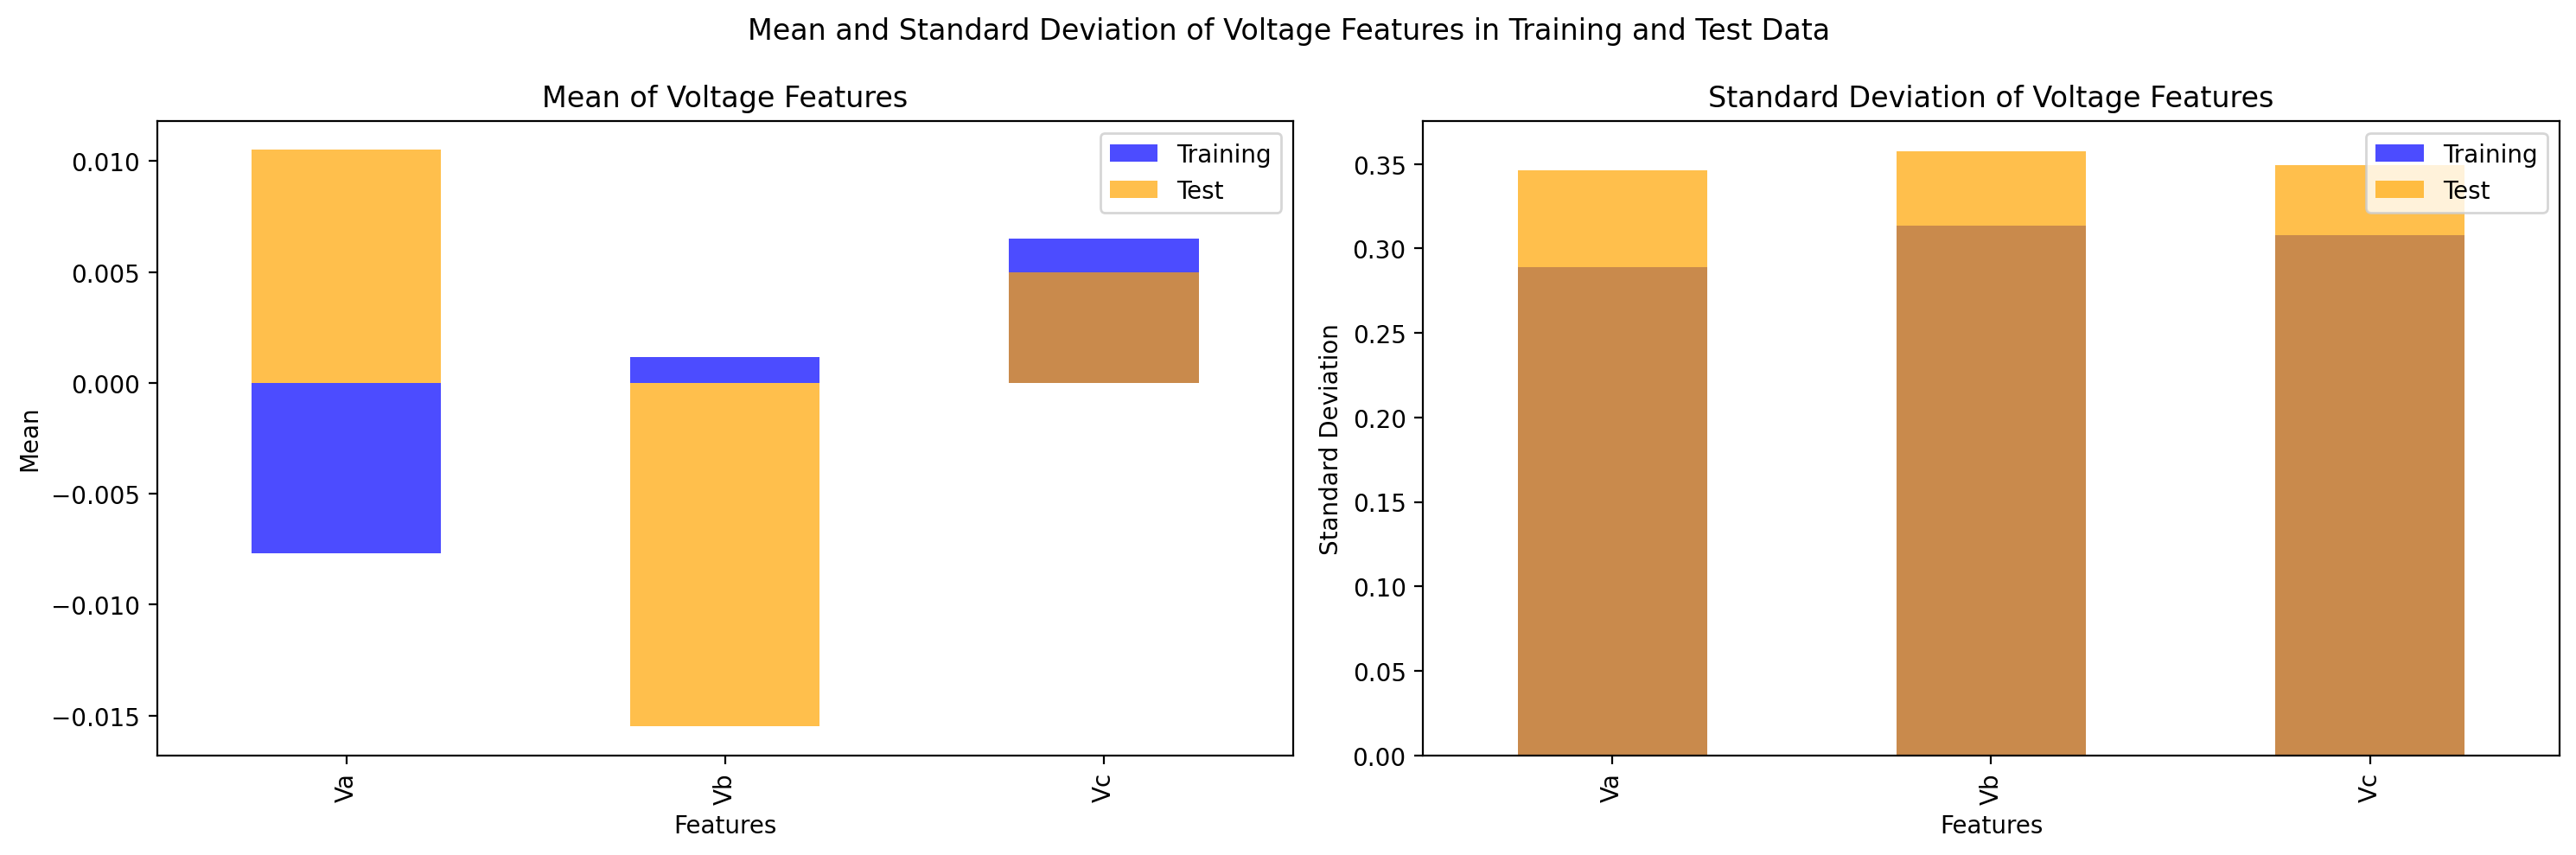

In [ ]:
# Extracting features
current_features = ['Ia', 'Ib', 'Ic']
voltage_features = ['Va', 'Vb', 'Vc']

# Calculate mean and standard deviation for current features
mean_current_train = train_data[current_features].mean()
std_current_train = train_data[current_features].std()

mean_current_test = test_file[current_features].mean()
std_current_test = test_file[current_features].std()

# Calculate mean and standard deviation for voltage features
mean_voltage_train = train_data[voltage_features].mean()
std_voltage_train = train_data[voltage_features].std()

mean_voltage_test = test_file[voltage_features].mean()
std_voltage_test = test_file[voltage_features].std()

# Plot bar plots for mean and standard deviation of current features
plt.figure(figsize=(15, 5))
plt.suptitle('Mean and Standard Deviation of Current Features in Training and Test Data')

plt.subplot(1, 2, 1)
mean_current_train.plot(kind='bar', color='blue', alpha=0.7, label='Training')
mean_current_test.plot(kind='bar', color='orange', alpha=0.7, label='Test')
plt.title('Mean of Current Features')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.legend()

plt.subplot(1, 2, 2)
std_current_train.plot(kind='bar', color='blue', alpha=0.7, label='Training')
std_current_test.plot(kind='bar', color='orange', alpha=0.7, label='Test')
plt.title('Standard Deviation of Current Features')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()

# Plot bar plots for mean and standard deviation of voltage features
plt.figure(figsize=(15, 5))
plt.suptitle('Mean and Standard Deviation of Voltage Features in Training and Test Data')

plt.subplot(1, 2, 1)
mean_voltage_train.plot(kind='bar', color='blue', alpha=0.7, label='Training')
mean_voltage_test.plot(kind='bar', color='orange', alpha=0.7, label='Test')
plt.title('Mean of Voltage Features')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.legend()

plt.subplot(1, 2, 2)
std_voltage_train.plot(kind='bar', color='blue', alpha=0.7, label='Training')
std_voltage_test.plot(kind='bar', color='orange', alpha=0.7, label='Test')
plt.title('Standard Deviation of Voltage Features')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()

### XyZ